In [32]:
import pandas as pd

# Visualuzation
import matplotlib.pyplot as plt
%matplotlib inline
#to render high res images
%config InlineBackend.figure_format='retina'


# ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier


from sklearn.utils import resample

# Scikit Learn packages
from sklearn.base import clone
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, cross_validate, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [25]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,name,job_title,organization,doc_link,doc_title,doc_abstract,doc_content
0,Mohamad Nazri Abd Karim,Lecturer in Finance,"School of Economics, Finance and Accounting",https://pureportal.coventry.ac.uk/en/publicati...,Stock Price and Volume Effects Associated with...,We examine the stock price and volume effects ...,mohamad nazri abd karim stock price volume eff...
1,Muhammad Abdullah,Lecturer in Finance,"School of Economics, Finance and Accounting",https://pureportal.coventry.ac.uk/en/publicati...,Assessing the Use of Gold as a Zero-Beta Asset...,This paper examines the use of the return on g...,muhammad abdullah assessing use gold zero beta...
2,Al-Noor Abdullah,Lecturer in Business Management,School of Strategy and Leadership,https://pureportal.coventry.ac.uk/en/publicati...,Social Impacts of a Mega-Dam Project as Percei...,The paper assesses social impacts of a mega-da...,al noor abdullah social impacts mega dam proje...
3,Al-Noor Abdullah,Lecturer in Business Management,School of Strategy and Leadership,https://pureportal.coventry.ac.uk/en/publicati...,Economic Contributions of Mega-Dam Infrastruct...,Investigations on the socioeconomic impacts of...,al noor abdullah economic contributions mega d...
4,Zahir Ahmad,Curriculum Lead (Associate Professor - Academic),School of Future Transport Engineering,https://pureportal.coventry.ac.uk/en/publicati...,Demonstration of a multi-hop underwater visibl...,This paper demonstrates a multi-hop underwater...,zahir ahmad demonstration multi hop underwater...


In [26]:
df['organization'].value_counts()

Centre for Trust, Peace and Social Relations                            704
Centre for Agroecology, Water and Resilience                            605
School of Energy, Construction and Environment                          523
Research Centre for Business in Society                                 491
Centre for Future Transport and Cities                                  416
School of Mechanical Engineering                                        332
Research Centre for Fluid and Complex Systems                           291
School of Strategy and Leadership                                       285
School of Future Transport Engineering                                  284
Research Centre for Arts, Memory and Communities                        280
Centre for Manufacturing and Materials                                  279
Research Centre for Dance Research (CDaRE)                              278
Centre for Healthcare and Communities                                   274
Centre Globa

Seprating various terms relating to engineerings, business and art.

In [27]:
engineering_terms = ['engineering', 'manufacturing', 'energy', 'construction', 'agroecology', 
                    'computing', 'science', 'sciences', 'computer', 'mechanical', 'civil', 'sport', 'mathematics', 'intelligent',
                    'healthcare', 'health', 'life', 'fluid', 'systems', 'computational']

business_terms = ['economics', 'economy', 'finance', 'accounting', 'strategy', 'financial', 'corporate', 'business', 
                 'law', 'marketing', 'management', 'entrepreneur', 'entrepreneurship', 'strategy', 'leadership']

art_terms = ['art', 'arts', 'design', 'humanities', 'dance', 'music', 'media', 'performing', 'culture', 'cultures',
            'community', 'communities', 'academic', 'writing', 'humanities', 'social']

In [28]:
# Add a new column called "category"
df['category'] = df['organization'].apply(lambda x: 'engineering' if any(term in x.lower() for term in engineering_terms)
                                          else 'business' if any(term in x.lower() for term in business_terms)
                                          else 'art' if any(term in x.lower() for term in art_terms)
                                          else '')

In [29]:
df.head()

,name,job_title,organization,doc_link,doc_title,doc_abstract,doc_content,category
0,Mohamad Nazri Abd Karim,Lecturer in Finance,"School of Economics, Finance and Accounting",https://pureportal.coventry.ac.uk/en/publicati...,Stock Price and Volume Effects Associated with...,We examine the stock price and volume effects ...,mohamad nazri abd karim stock price volume eff...,business
1,Muhammad Abdullah,Lecturer in Finance,"School of Economics, Finance and Accounting",https://pureportal.coventry.ac.uk/en/publicati...,Assessing the Use of Gold as a Zero-Beta Asset...,This paper examines the use of the return on g...,muhammad abdullah assessing use gold zero beta...,business
2,Al-Noor Abdullah,Lecturer in Business Management,School of Strategy and Leadership,https://pureportal.coventry.ac.uk/en/publicati...,Social Impacts of a Mega-Dam Project as Percei...,The paper assesses social impacts of a mega-da...,al noor abdullah social impacts mega dam proje...,business
3,Al-Noor Abdullah,Lecturer in Business Management,School of Strategy and Leadership,https://pureportal.coventry.ac.uk/en/publicati...,Economic Contributions of Mega-Dam Infrastruct...,Investigations on the socioeconomic impacts of...,al noor abdullah economic contributions mega d...,business
4,Zahir Ahmad,Curriculum Lead (Associate Professor - Academic),School of Future Transport Engineering,https://pureportal.coventry.ac.uk/en/publicati...,Demonstration of a multi-hop underwater visibl...,This paper demonstrates a multi-hop underwater...,zahir ahmad demonstration multi hop underwater...,engineering


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8924 entries, 0 to 8923
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8924 non-null   object
 1   job_title     8924 non-null   object
 2   organization  8924 non-null   object
 3   doc_link      8924 non-null   object
 4   doc_title     8924 non-null   object
 5   doc_abstract  8924 non-null   object
 6   doc_content   8924 non-null   object
 7   category      8924 non-null   object
dtypes: object(8)
memory usage: 557.9+ KB


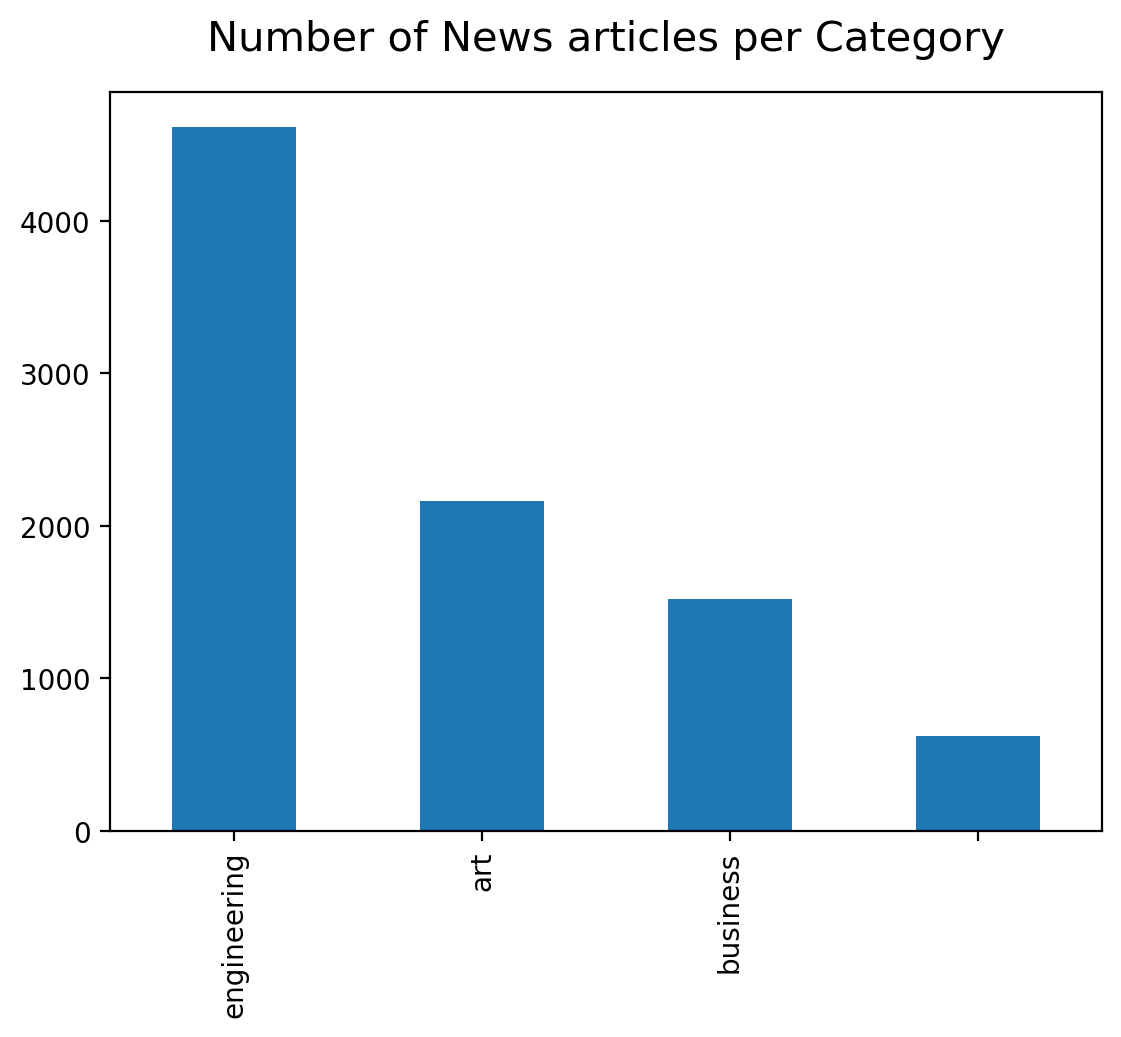

In [31]:
df['category'].value_counts().plot(kind='bar')
plt.title('Number of News articles per Category', size=15, pad=15);

In [36]:
balanced_df = pd.DataFrame()

categories = df['category'].unique()
for category in categories:
    category_df = df[df['category'] == category]
    balanced_category_df = resample(category_df, replace=True, n_samples=len(category_df), random_state=42)
    balanced_df = pd.concat([balanced_df, balanced_category_df])

# Reset the index of the balanced dataframe
balanced_df = balanced_df.reset_index(drop=True)

In [37]:
balanced_df.head()

,name,job_title,organization,doc_link,doc_title,doc_abstract,doc_content,category
0,Alexeis Garcia-Perez,Professor in Management Information Systems,Research Centre for Business in Society,https://pureportal.coventry.ac.uk/en/publicati...,Building affective commitment in a financial i...,Purpose: Ambidexterity refers to the tension b...,alexeis garcia perez building affective commit...,business
1,Lindsey Appleyard,Assistant Professor Research,Research Centre for Business in Society,https://pureportal.coventry.ac.uk/en/publicati...,Community Development Finance Institutions (CD...,The financial exclusion of enterprise is a con...,lindsey appleyard community development financ...,business
2,Ehsan Khajeh,Assistant Professor (Academic),School of Strategy and Leadership,https://pureportal.coventry.ac.uk/en/publicati...,Investigating Optimum Length of Physical Queue...,Queue is regarded as the central aspect of ser...,ehsan khajeh investigating optimum length phys...,business
3,Ian Brittain,Associate Professor Research,Research Centre for Business in Society,https://pureportal.coventry.ac.uk/en/publicati...,Military Links to Competitive Sport and Games ...,The Paralympic Games grew out of the use of sp...,ian brittain military links competitive sport ...,business
4,Alexeis Garcia-Perez,Professor in Management Information Systems,Research Centre for Business in Society,https://pureportal.coventry.ac.uk/en/publicati...,Environmental knowledge strategy: driving succ...,Purpose,alexeis garcia perez environmental knowledge s...,business


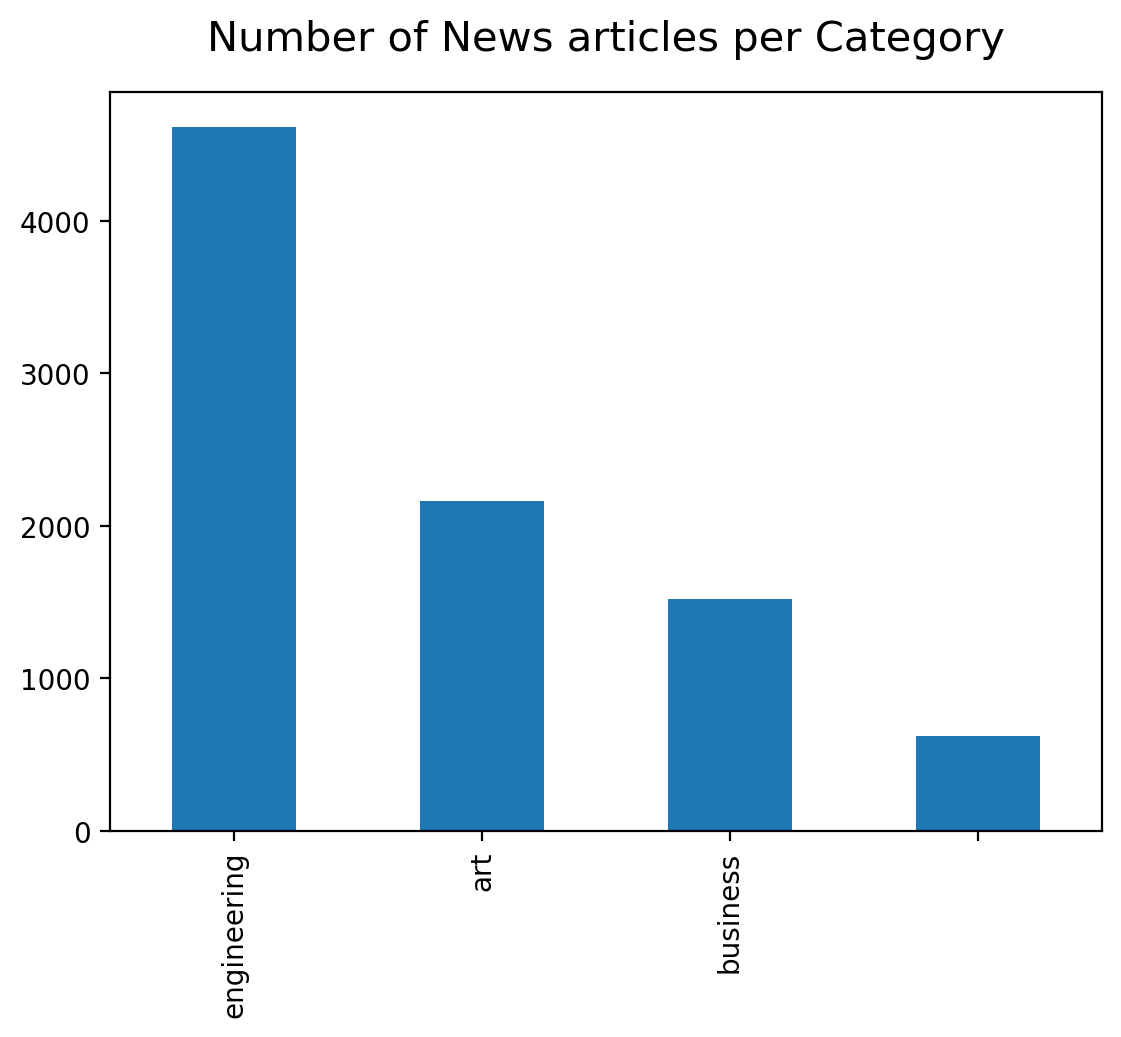

In [38]:
balanced_df['category'].value_counts().plot(kind='bar')
plt.title('Number of News articles per Category', size=15, pad=15);